In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight_data=pd.read_excel('Data_Train.xlsx') #file is in excelformate 

In [3]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_data["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [5]:
flight_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


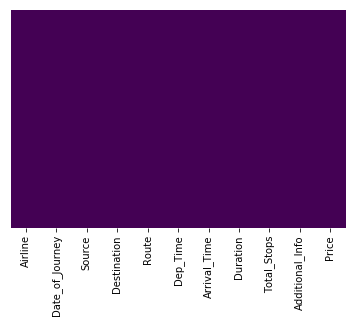

In [6]:
#this heatmap shows that there is no null value in dataset 
sns.heatmap(flight_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
flight_data.info()
#contain object datatype only price is int data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [8]:
flight_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
5h 15m      62
11h         62
11h 45m     62
          ... 
37h 10m      1
36h 25m      1
35h 35m      1
47h          1
30h 10m      1
4h 10m       1
33h 20m      1
31h 30m      1
41h 20m      1
32h 55m      1
28h 30m      1
33h 45m      1
29h 30m      1
47h 40m      1
13h 35m      1
31h 50m      1
5m           1
42h 45m      1
30h 15m      1
29h 10m      1
32h 20m      1
30h 25m      1
29h 40m      1
3h 25m       1
42h 5m       1
27h 30m      1
19h 50m      1
27h 55m      1
40h 20m      1
35h 20m      1
Name: Duration, Length: 368, dtype: int64

##extracting date , month and year in other columns

In [9]:
flight_data['Day_of_journey']=pd.to_datetime(flight_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [10]:
flight_data['Month_of_journey']=pd.to_datetime(flight_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [11]:
flight_data['Year_of_journey']=pd.to_datetime(flight_data.Date_of_Journey,format="%d/%m/%Y").dt.year

In [12]:
flight_data=flight_data.drop('Date_of_Journey',axis=1)
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


#now we are extracting values of hours and minutes from Dep_time

In [13]:
flight_data["Dep_hour"]=pd.to_datetime(flight_data["Dep_Time"]).dt.hour
flight_data["Dep_min"]=pd.to_datetime(flight_data["Dep_Time"]).dt.minute
flight_data=flight_data.drop('Dep_Time',axis=1)
flight_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


#extracting values from arival time

In [14]:
flight_data["Arrival_hour"]=pd.to_datetime(flight_data["Arrival_Time"]).dt.hour
flight_data["Arrival_min"]=pd.to_datetime(flight_data["Arrival_Time"]).dt.minute
flight_data=flight_data.drop('Arrival_Time',axis=1)

In [15]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


#modifying duration data for separating hour and min

In [16]:
duration_hour=[]
duration_min=[]
duration=list(flight_data["Duration"]) # creating a list having data of duration column that will make our separation work easy 
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]     

print(duration)

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h 0m', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h 0m', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h 0m', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h 0m', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h 0m', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h 0m', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', 

In [17]:
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [18]:
flight_data['Duration_hours']=duration_hour
flight_data['Duration_mins']=duration_min

In [19]:
flight_data=flight_data.drop('Duration',axis=1)
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


#handle Categoriacal data

1.Nominal data-> data are not in order = ONEHOTENCODING is used 

2.Ordinal data-> data are in order = LABELENCODER is used in this case

In [20]:
flight_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

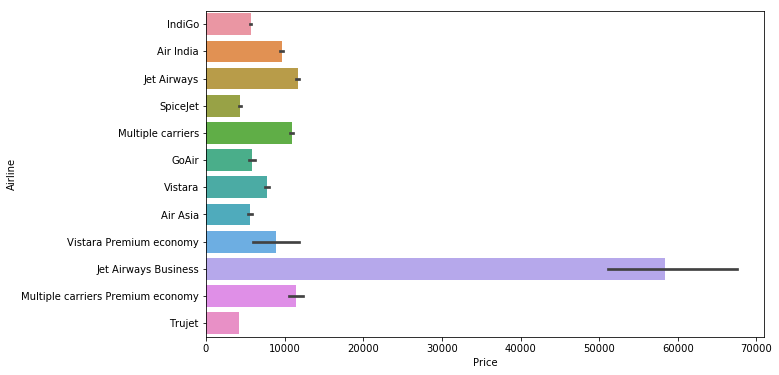

In [21]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="Price",y="Airline",data=flight_data)

In [22]:
Airline=flight_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


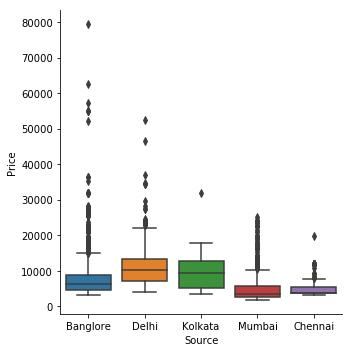

In [23]:
sns.catplot(y="Price",x="Source",data=flight_data.sort_values("Price",ascending=False),kind='box')
plt.show()

In [24]:
Source=flight_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
Destination=flight_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
flight_data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [27]:
flight_data.drop(["Route","Additional_Info"],axis=1,inplace=True) #Route and total stop gives the same information 
                                                                  #remove either of them
    

In [28]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


In [29]:
flight_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
flight_data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace=True)
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,16,50,21,35,4,45


In [31]:
#combine all catorical data after onehotcoding
train_data=pd.concat([flight_data,Airline,Source,Destination],axis=1)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,16,50,...,0,0,0,0,0,0,0,0,0,1


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
Airline                                      10683 non-null object
Source                                       10683 non-null object
Destination                                  10683 non-null object
Total_Stops                                  10682 non-null float64
Price                                        10683 non-null int64
Day_of_journey                               10683 non-null int64
Month_of_journey                             10683 non-null int64
Year_of_journey                              10683 non-null int64
Dep_hour                                     10683 non-null int64
Dep_min                                      10683 non-null int64
Arrival_hour                                 10683 non-null int64
Arrival_min                                  10683 non-null int64
Duration_hours                               10683 non-null int64
Duration_mins               

In [33]:
train_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [34]:
train_data.head()

,Total_Stops,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [35]:
print(flight_data.shape)
print(" ")
print(train_data.shape)

(10683, 14)
 
(10683, 31)


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 31 columns):
Total_Stops                                  10682 non-null float64
Price                                        10683 non-null int64
Day_of_journey                               10683 non-null int64
Month_of_journey                             10683 non-null int64
Year_of_journey                              10683 non-null int64
Dep_hour                                     10683 non-null int64
Dep_min                                      10683 non-null int64
Arrival_hour                                 10683 non-null int64
Arrival_min                                  10683 non-null int64
Duration_hours                               10683 non-null int64
Duration_mins                                10683 non-null int64
Airline_Air India                            10683 non-null uint8
Airline_GoAir                                10683 non-null uint8
Airline_IndiGo                 

In [37]:
train_data['Total_Stops']=train_data['Total_Stops'].apply(np.float32)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 31 columns):
Total_Stops                                  10682 non-null float64
Price                                        10683 non-null int64
Day_of_journey                               10683 non-null int64
Month_of_journey                             10683 non-null int64
Year_of_journey                              10683 non-null int64
Dep_hour                                     10683 non-null int64
Dep_min                                      10683 non-null int64
Arrival_hour                                 10683 non-null int64
Arrival_min                                  10683 non-null int64
Duration_hours                               10683 non-null int64
Duration_mins                                10683 non-null int64
Airline_Air India                            10683 non-null uint8
Airline_GoAir                                10683 non-null uint8
Airline_IndiGo                 

In [38]:
X=train_data.loc[:, ['Total_Stops', 'Day_of_journey', 'Month_of_journey', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 29 columns):
Total_Stops                                  10682 non-null float64
Day_of_journey                               10683 non-null int64
Month_of_journey                             10683 non-null int64
Dep_hour                                     10683 non-null int64
Dep_min                                      10683 non-null int64
Arrival_hour                                 10683 non-null int64
Arrival_min                                  10683 non-null int64
Duration_hours                               10683 non-null int64
Duration_mins                                10683 non-null int64
Airline_Air India                            10683 non-null uint8
Airline_GoAir                                10683 non-null uint8
Airline_IndiGo                               10683 non-null uint8
Airline_Jet Airways                          10683 non-null uint8
Airline_Jet Airways Business   

In [40]:
y=train_data['Price']
y.dtype

dtype('int64')

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
plt.figure(figsize=(12,8))
imp_feature=pd.Series(selection.feature_importances_,index=x.columns)
imp_feature.nlargest(20).plot(kind='barh')
plt.show

# Test data set 

In [ ]:
test_data=pd.read_excel('flight fare Test_set.xlsx')
test_data.head()

In [ ]:
test_data["Destination"].value_counts()

In [ ]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
test_data['Day_of_journey']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data['Month_of_journey']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month
test_data['Year_of_journey']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.year
test_data=test_data.drop('Date_of_Journey',axis=1)
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data=test_data.drop('Dep_Time',axis=1)
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_min"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data=test_data.drop('Arrival_Time',axis=1)
duration_hour=[]
duration_min=[]
duration=list(test_data["Duration"]) # creating a list having data of duration column that will make our separation work easy 
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]  
            
            
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
    

test_data['Duration_hours']=duration_hour
test_data['Duration_mins']=duration_min
test_data=test_data.drop('Duration',axis=1)

Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)

Source=test_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)

Destination=test_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)

test_data=test_data.drop(["Airline","Source","Destination"],axis=1)

flight_test_data=pd.concat([test_data,Airline,Source,Destination],axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
flight_test_data=flight_test_data.drop(["Route","Additional_Info"],axis=1)
flight_test_data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace=True)
flight_test_data.head()

In [ ]:
flight_test_data.shape

# Feature Selection